In [1]:
import pandas as pd
import numpy as np
##import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Columns

* idLobbyGame: Match id
* idPlayer: Player id
* idRoom: Room id
* qtKill: Number of kills
* qtAssist: Number of assists
* qtDeath: Number of death
* qtHs: Number of kills by head shot
* qtBombeDefuse: Number of bomb defuses
* qtBombePlant: Number of bomb plants
* qtTk: Number of team kills
* qtTkAssist: Number of teams kills assists
* qt1Kill: Number of rounds with one kill
* qt2Kill: Number of rounds with two kill
* qt3Kill: Number of rounds with three kill
* qt4Kill: Number of rounds with four kill
* qt5Kill: Number of rounds with five kill
* qtPlusKill: Number of rounds with more than one kill
* qtFirstKill: Number of rounds with first kill
* vlDamage: Total match damage
* qtHits: Total match hits
* qtShots: Total match shots
* qtLastAlive: Number of rounds being last alive
* qtClutchWon: Total clutchs wons
* qtRoundsPlayed: Total rounds played
* descMapName: Map name
* vlLevel: GC level
* qtSurvived: Number of rounds survived
* qtTrade: Number of trade kills
* qtFlashAssist: Number of flash assists
* qtHitHeadshot: Total headshots hits
* qtHitChest: Total chest hits
* qtHitStomach:  Total stomach hits
* qtHitLeftAtm: Total left arm hits
* qtHitRightArm: Total right arm hits
* qtHitLeftLeg: Total left leg
* qtHitRightLeg: Total right leg
* flWinner: Match winner flag (1 or 0)
* dtCreatedAt: Match datetime


In [3]:
#path = '/content/drive/MyDrive/datasets/tcc/tb_lobby_stats_player.csv'
path = 'data/tb_lobby_stats_player.csv'

data = pd.read_csv(path)
data.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


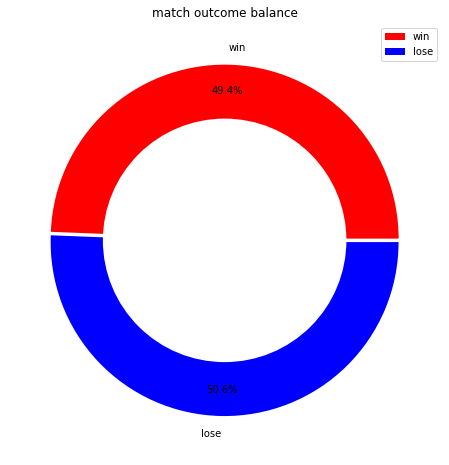

In [4]:
def donutPlot(targets, colors, labels, explode, title, figsize):
    ## Setting Chart
    fig, ax = plt.subplots(figsize = figsize)
    # Pie Chart
    plt.pie(targets, colors = colors, labels = labels, autopct = '%1.1f%%', pctdistance = 0.85, explode = explode)
    # draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig = plt.gcf()
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    # Adding Title of chart
    plt.title(title)
    ## Adding legend
    plt.legend()
    # Displaying Chart
    plt.show()

def configTargetDonutPlot(data, column):
    positiveClass = data.loc[data[column] == 1].count()[0]
    negativeClass = data.loc[data[column] == 0].count()[0]
    targets = [positiveClass, negativeClass]
    return targets

targets = configTargetDonutPlot(data, 'flWinner')
colors = ['red', 'blue']
labels = ['win', 'lose']
explode = [0.01, 0.01]
title = 'match outcome balance'
figsize = (10,8)

donutPlot(targets = targets,
          colors = colors,
          labels = labels,
          explode = explode,
          title = title,
          figsize = figsize)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184152 entries, 0 to 184151
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idLobbyGame     184152 non-null  int64  
 1   idPlayer        184152 non-null  int64  
 2   idRoom          184152 non-null  int64  
 3   qtKill          184152 non-null  int64  
 4   qtAssist        184152 non-null  int64  
 5   qtDeath         184152 non-null  int64  
 6   qtHs            184152 non-null  int64  
 7   qtBombeDefuse   184152 non-null  int64  
 8   qtBombePlant    184152 non-null  int64  
 9   qtTk            184032 non-null  float64
 10  qtTkAssist      184032 non-null  float64
 11  qt1Kill         184152 non-null  int64  
 12  qt2Kill         184152 non-null  int64  
 13  qt3Kill         184152 non-null  int64  
 14  qt4Kill         184152 non-null  int64  
 15  qt5Kill         184152 non-null  int64  
 16  qtPlusKill      184152 non-null  int64  
 17  qtFirstKil

In [6]:
def checkNaNValues(df):
    return df.isna().sum()

checkNaNValues(data)

idLobbyGame         0
idPlayer            0
idRoom              0
qtKill              0
qtAssist            0
qtDeath             0
qtHs                0
qtBombeDefuse       0
qtBombePlant        0
qtTk              120
qtTkAssist        120
qt1Kill             0
qt2Kill             0
qt3Kill             0
qt4Kill             0
qt5Kill             0
qtPlusKill          0
qtFirstKill         0
vlDamage            0
qtHits            120
qtShots             0
qtLastAlive       120
qtClutchWon         0
qtRoundsPlayed      0
descMapName         0
vlLevel             0
qtSurvived        705
qtTrade           705
qtFlashAssist     705
qtHitHeadshot     705
qtHitChest        705
qtHitStomach      705
qtHitLeftAtm      705
qtHitRightArm     705
qtHitLeftLeg      705
qtHitRightLeg     705
flWinner            0
dtCreatedAt         0
dtype: int64

In [7]:
def getNaNRows(df):
    nan_rows = df[df.isna().any(axis=1)]
    return nan_rows

filteredMissingData = getNaNRows(data)
print(f'lenght of the missing data: {len(filteredMissingData)}')
filteredMissingData.head()

lenght of the missing data: 705


,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
428,396,10,396,13,5,26,9,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-04 20:26:02
429,397,10,397,20,2,20,12,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-04 21:25:14
435,402,10,402,21,1,23,13,0,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-06 01:33:23
446,412,10,412,21,3,23,10,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-08 22:47:40
447,413,10,413,34,4,22,21,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-09 00:12:28


In [8]:
## the classes are balanced, so we don't have a problem in dropping those rows with NaN values
def dropRowsWithNaNs(data):
    new_data = data.dropna().reset_index(drop = True)
    return new_data

data = dropRowsWithNaNs(data)
checkNaNValues(data)

idLobbyGame       0
idPlayer          0
idRoom            0
qtKill            0
qtAssist          0
qtDeath           0
qtHs              0
qtBombeDefuse     0
qtBombePlant      0
qtTk              0
qtTkAssist        0
qt1Kill           0
qt2Kill           0
qt3Kill           0
qt4Kill           0
qt5Kill           0
qtPlusKill        0
qtFirstKill       0
vlDamage          0
qtHits            0
qtShots           0
qtLastAlive       0
qtClutchWon       0
qtRoundsPlayed    0
descMapName       0
vlLevel           0
qtSurvived        0
qtTrade           0
qtFlashAssist     0
qtHitHeadshot     0
qtHitChest        0
qtHitStomach      0
qtHitLeftAtm      0
qtHitRightArm     0
qtHitLeftLeg      0
qtHitRightLeg     0
flWinner          0
dtCreatedAt       0
dtype: int64

In [9]:
def getUniqueValues(df):
    unique_values = {}
    for col in df.columns:
        unique_values[col] = df[col].nunique()
    return pd.Series(unique_values)


uniqueDataValues = getUniqueValues(data)
uniqueDataValues

idLobbyGame       172270
idPlayer            2469
idRoom            177839
qtKill                74
qtAssist              21
qtDeath               58
qtHs                  39
qtBombeDefuse          6
qtBombePlant          13
qtTk                   7
qtTkAssist             9
qt1Kill               30
qt2Kill               17
qt3Kill               12
qt4Kill                7
qt5Kill                4
qtPlusKill             1
qtFirstKill           20
vlDamage            5891
qtHits               213
qtShots             1401
qtLastAlive           28
qtClutchWon            9
qtRoundsPlayed        67
descMapName            8
vlLevel               22
qtSurvived            36
qtTrade               18
qtFlashAssist         12
qtHitHeadshot         48
qtHitChest           108
qtHitStomach          69
qtHitLeftAtm          18
qtHitRightArm         28
qtHitLeftLeg          22
qtHitRightLeg         23
flWinner               2
dtCreatedAt       169864
dtype: int64

In [10]:
def filterData(series, condition):
    filtered_series = series[condition]
    return filtered_series

filterData(uniqueDataValues, uniqueDataValues <= 2)

qtPlusKill    1
flWinner      2
dtype: int64

In [11]:
data['qtPlusKill'].value_counts()

0    183447
Name: qtPlusKill, dtype: int64

In [12]:
def removeColumn(df, columnsName):
    new_df = df.drop(columns=[columnsName])
    return new_df

data = removeColumn(data, 'qtPlusKill')
data.columns

Index(['idLobbyGame', 'idPlayer', 'idRoom', 'qtKill', 'qtAssist', 'qtDeath',
       'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist',
       'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtFirstKill',
       'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon',
       'qtRoundsPlayed', 'descMapName', 'vlLevel', 'qtSurvived', 'qtTrade',
       'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach',
       'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg',
       'flWinner', 'dtCreatedAt'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder


def splitData(df, dropList, target):
    x = df.drop(dropList, axis = 1)
    y = df[target]
    return x, y


def encodeSingleLabel(column):
    enc = LabelEncoder()
    new_column = enc.fit_transform(column)
    return new_column


def removeCategoricalFeatures(df):
    numericalColumns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numericalDF = df[numericalColumns]
    return numericalDF


def getFeatureTypes(df):
    feature_types = {}

    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            feature_types[col] = 'numerical'
        else:
            feature_types[col] = 'categorical'

    return feature_types

def convertCategoricalFeatures(df, featureTypes):
    for colName, featureType in featureTypes.items():
        if featureType == 'categorical':
            df[colName] = encodeSingleLabel(df[colName])

    return df

def describeData(df):
    statistics = pd.DataFrame()
    for col in df.columns:
        col_stats = {}
        col_data = df[col]

        col_stats['mean'] = np.mean(col_data)
        col_stats['std'] = np.std(col_data)
        col_stats['min'] = np.min(col_data)
        col_stats['25%'] = np.percentile(col_data, 25)
        col_stats['50%'] = np.median(col_data)
        col_stats['75%'] = np.percentile(col_data, 75)
        col_stats['max'] = np.max(col_data)
        #col_stats['skew'] = col_data.skew()
        #col_stats['kurtosis'] = col_data.kurtosis()

        statistics[col] = col_stats.values()
        statistics.index = col_stats.keys()

    return statistics.T

X, y = splitData(data, ['idLobbyGame', 'idPlayer', 'idRoom', 'flWinner', 'dtCreatedAt'], 'flWinner')
X = removeCategoricalFeatures(X)

statsData = describeData(X)
statsData

,mean,std,min,25%,50%,75%,max
qtKill,19.111940,7.482559,0.0,14.0,19.0,24.0,85.0
qtAssist,3.752326,2.202281,0.0,2.0,4.0,5.0,24.0
qtDeath,18.794785,5.211966,0.0,16.0,19.0,22.0,65.0
qtHs,7.634439,4.040298,0.0,5.0,7.0,10.0,41.0
qtBombeDefuse,0.316064,0.575848,0.0,0.0,0.0,1.0,5.0
qtBombePlant,1.320376,1.336235,0.0,0.0,1.0,2.0,12.0
qtTk,0.022328,0.155968,0.0,0.0,0.0,0.0,12.0
qtTkAssist,0.248181,0.548601,0.0,0.0,0.0,0.0,9.0
qt1Kill,8.008978,3.042899,0.0,6.0,8.0,10.0,31.0
qt2Kill,3.429993,2.050796,0.0,2.0,3.0,5.0,16.0


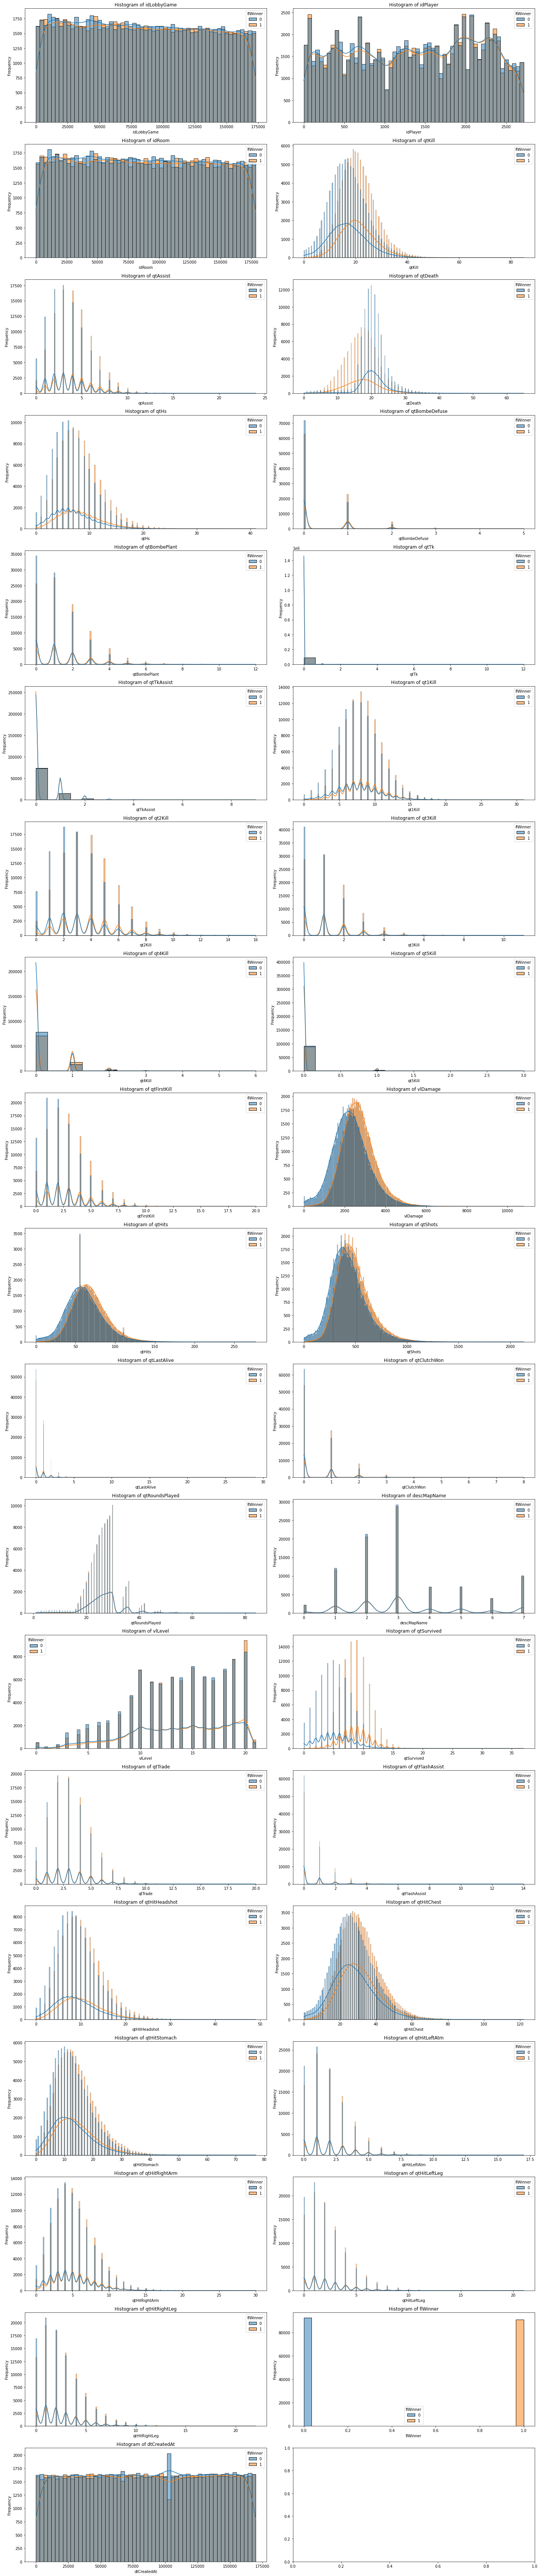

In [14]:
def histPlot(df):
    n_rows = (len(df.columns) + 1) // 2  # Number of rows
    n_cols = 2  # Number of columns
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))
    for ax, col in zip(axes.flat, df.columns):
        #print(df[col].value_counts())
        sns.histplot(data=df, x=col, hue = 'flWinner', kde=True, ax=ax)
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()


featureTypes = getFeatureTypes(data)
data = convertCategoricalFeatures(data, featureTypes)
histPlot(data)


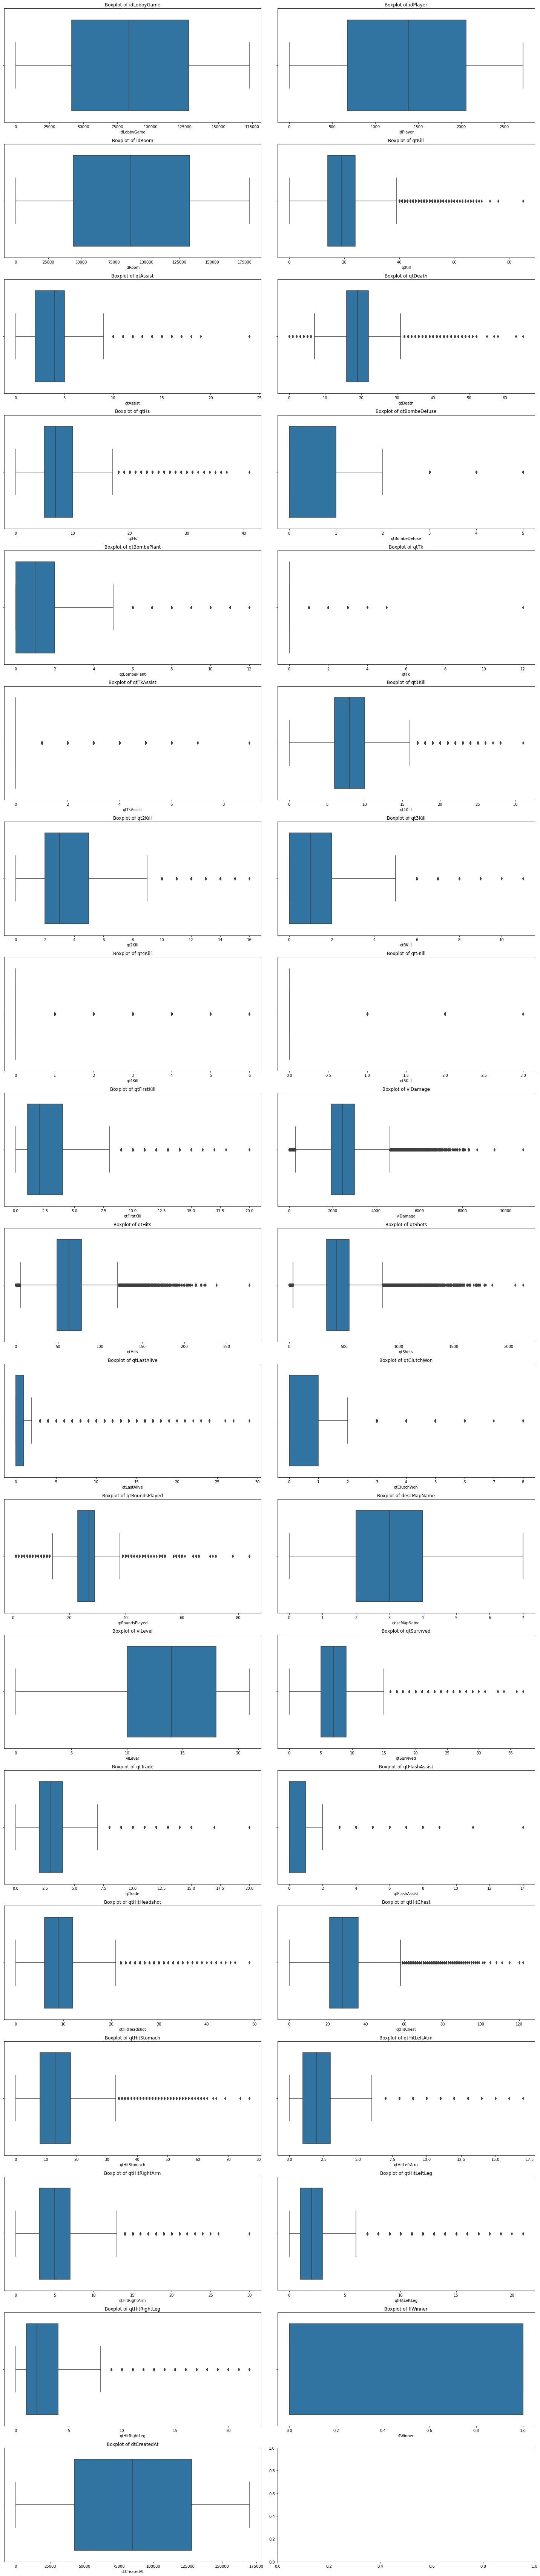

In [15]:
def boxPlots(df):
    n_rows = (len(df.columns) + 1) // 2  # Number of rows
    n_cols = 2  # Number of columns
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))
    for ax, col in zip(axes.flat, df.columns):
        sns.boxplot(data=df, x=col, ax=ax)
        ax.set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


boxPlots(data)

In [16]:
from scipy.stats import normaltest, skewtest, kurtosistest


def getDistributionTypes(df):
    
    distribution_types = {}
    
    for col in df.columns:
        # Test for normality
        normaltest_result = normaltest(df[col])
        
        if normaltest_result.pvalue < 0.05:
            # If not normal, test for skewness and kurtosis
            skewtest_result = skewtest(df[col])
            kurtosistest_result = kurtosistest(df[col])
            
            if skewtest_result.pvalue < 0.05 and kurtosistest_result.pvalue < 0.05:
                distribution_types[col] = 'highly skewed and peaked'
            elif skewtest_result.pvalue < 0.05:
                distribution_types[col] = 'skewed'
            elif kurtosistest_result.pvalue < 0.05:
                distribution_types[col] = 'peaked'
            else:
                distribution_types[col] = 'neither normal, skewed, nor peaked'
        else:
            distribution_types[col] = 'normal'
    
    return distribution_types


distributionTypes = getDistributionTypes(data)
distributionTypes

{'idLobbyGame': 'highly skewed and peaked',
 'idPlayer': 'highly skewed and peaked',
 'idRoom': 'highly skewed and peaked',
 'qtKill': 'highly skewed and peaked',
 'qtAssist': 'highly skewed and peaked',
 'qtDeath': 'peaked',
 'qtHs': 'highly skewed and peaked',
 'qtBombeDefuse': 'highly skewed and peaked',
 'qtBombePlant': 'highly skewed and peaked',
 'qtTk': 'highly skewed and peaked',
 'qtTkAssist': 'highly skewed and peaked',
 'qt1Kill': 'highly skewed and peaked',
 'qt2Kill': 'highly skewed and peaked',
 'qt3Kill': 'highly skewed and peaked',
 'qt4Kill': 'highly skewed and peaked',
 'qt5Kill': 'highly skewed and peaked',
 'qtFirstKill': 'highly skewed and peaked',
 'vlDamage': 'highly skewed and peaked',
 'qtHits': 'highly skewed and peaked',
 'qtShots': 'highly skewed and peaked',
 'qtLastAlive': 'highly skewed and peaked',
 'qtClutchWon': 'highly skewed and peaked',
 'qtRoundsPlayed': 'highly skewed and peaked',
 'descMapName': 'highly skewed and peaked',
 'vlLevel': 'highly ske

In [20]:
import statsmodels.stats.power as smp

def powerAnalysis(df, effect_size, alpha, power, alternative='two-sided'):
    # Determine the number of groups and observations per group
    num_groups = df.shape[1]
    num_obs = df.shape[0]

    # Calculate the sample size required for each group
    sample_sizes = []
    for i in range(num_groups):
        effect_size_i = effect_size / (num_groups ** 0.5)  # Bonferroni correction
        sample_size_i = smp.tt_ind_solve_power(effect_size=effect_size_i, nobs1=None, alpha=alpha, power=power, ratio=1, alternative=alternative)
        sample_sizes.append(sample_size_i)

    # Convert the sample sizes to integers and return as a DataFrame
    sample_sizes = [int(round(size)) for size in sample_sizes]
    result = pd.DataFrame({'Sample Size': sample_sizes}, index=df.columns)

    return result



np.random.seed(42)
sample_sizes = powerAnalysis(data, effect_size=0.5, alpha=0.05, power=0.8, alternative='two-sided')
sample_sizes

,Sample Size
idLobbyGame,2324
idPlayer,2324
idRoom,2324
qtKill,2324
qtAssist,2324
qtDeath,2324
qtHs,2324
qtBombeDefuse,2324
qtBombePlant,2324
qtTk,2324


In [21]:
def percentageOfX(x, y):
    return (y / x)

def getSampleFromData(df, n):
    np.random.seed(42)
    sample_data = df.sample(frac = n)
    return sample_data


n = percentageOfX(x = len(data), y = 5000)
sampleData = getSampleFromData(data, n)

print(f'{len(sampleData)} sample size')
print(f'{len(data)} data size')

5000 sample size
183447 data size


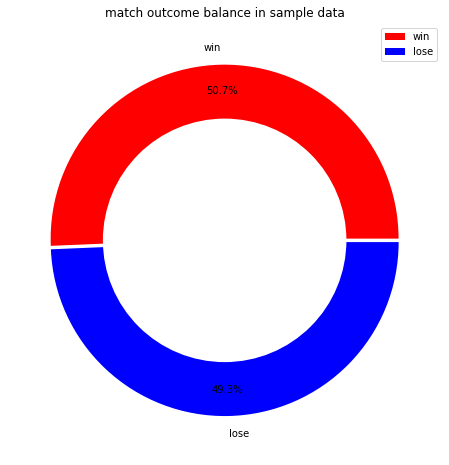

In [22]:
targets = configTargetDonutPlot(sampleData, 'flWinner')
title = 'match outcome balance in sample data'

donutPlot(targets = targets,
          colors = colors,
          labels = labels,
          explode = explode,
          title = title,
          figsize = figsize)

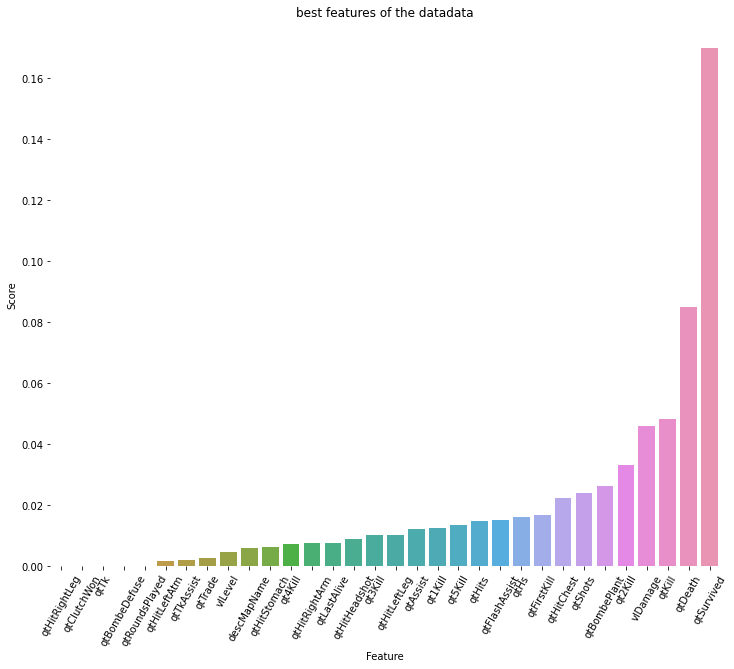

In [23]:
from sklearn.feature_selection import mutual_info_classif

def createEstimatorScoreDF(x, estimatorScore, sortedIdx):
    estimatorScoreDF = pd.DataFrame(estimatorScore[sortedIdx[::-1]], index=x.columns[sortedIdx[::-1]], columns=['score'])
    return estimatorScoreDF

def plotEstimatorScore(x, sortedIdx, estimatorScore, title):
    fig, ax = plt.subplots(1,1, figsize = (12,10))
    sns.barplot(x = x.columns[sortedIdx], y = estimatorScore[sortedIdx])
    ax.set(xlabel = 'Feature', ylabel = 'Score', title = title)
    plt.xticks(rotation = 60, fontsize = 10)
    sns.despine(left=True, bottom=True)
    plt.show()

def estimatorScore(x, y, title):
    estimatorScore = mutual_info_classif(x, y, random_state = 42)
    sortedIdx = np.argsort(estimatorScore)

    estimatorScoreDF = createEstimatorScoreDF(x, estimatorScore, sortedIdx)

    plotEstimatorScore(x, sortedIdx, estimatorScore, title)

    return estimatorScoreDF

def selectKBestFeatures(k, estimatorScore, df):
    k_best = k
    k_best_features = estimatorScore.iloc[:k_best, :].index
    k_best_df = df[k_best_features]
    return k_best_df




X, y = splitData(sampleData, ['idLobbyGame', 'idPlayer', 'idRoom', 'flWinner', 'dtCreatedAt'], 'flWinner')

featureTypes = getFeatureTypes(X)
X = convertCategoricalFeatures(X, featureTypes)

estimatorScores = estimatorScore(X, y, 'best features of the datadata')

In [25]:
k = 10

kBestFeatures = selectKBestFeatures(k, estimatorScores, X)
print(f'size of kBestFeatures: {len(kBestFeatures)}')

kBestFeatures.head()

size of kBestFeatures: 5000


,qtSurvived,qtDeath,qtKill,vlDamage,qt2Kill,qtBombePlant,qtShots,qtHitChest,qtFirstKill,qtHs
144576,5.0,19,15,2181,2,1,608,27.0,1,9
181413,11.0,13,19,1991,5,5,295,25.0,1,3
181756,7.0,22,13,2457,4,0,374,23.0,3,4
143565,9.0,19,24,3245,1,5,529,40.0,4,7
7584,9.0,11,21,2822,6,0,610,38.0,4,13


C:\Users\Lucas\AppData\Local\Temp\ipykernel_16300\3621842202.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kBestFeatures['flWinner'] = sampleData['flWinner']


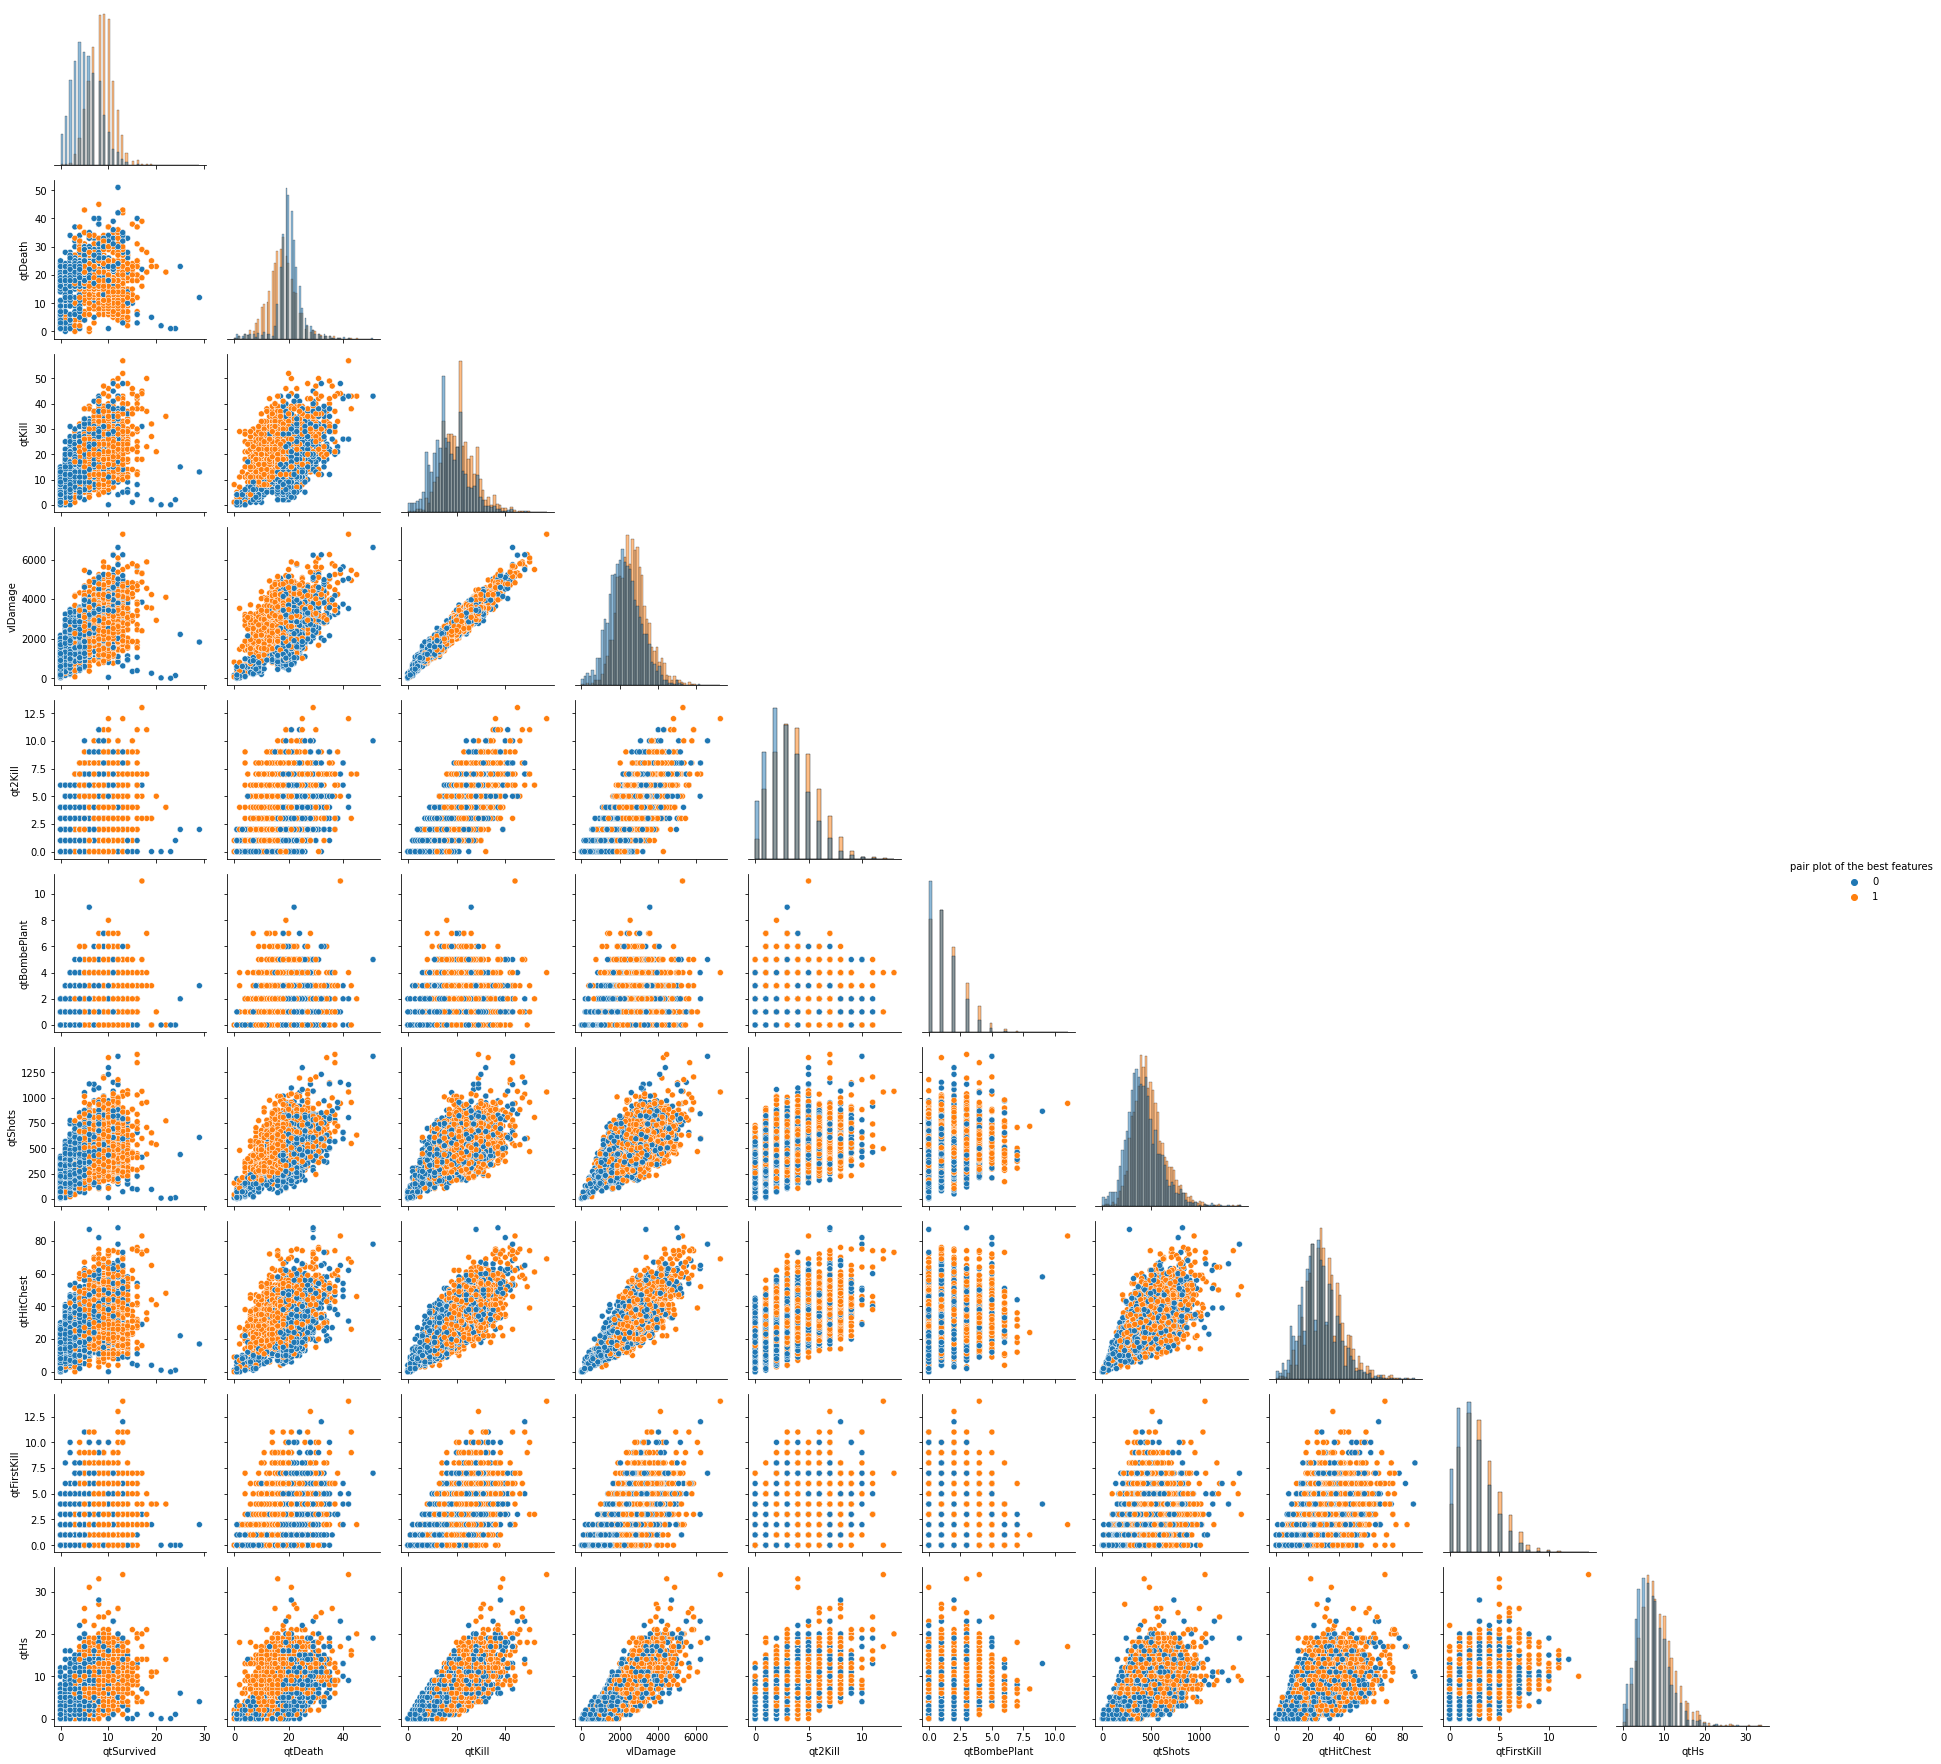

In [26]:
def pairPlot(df, hue):
    plot = sns.PairGrid(df, hue= hue, diag_sharey=False, corner=True)
    plot.map_lower(sns.scatterplot)
    plot.map_diag(sns.histplot)
    plot.add_legend(title="pair plot of the best features")
    plt.show()

kBestFeatures['flWinner'] = sampleData['flWinner']
pairPlot(kBestFeatures, 'flWinner')

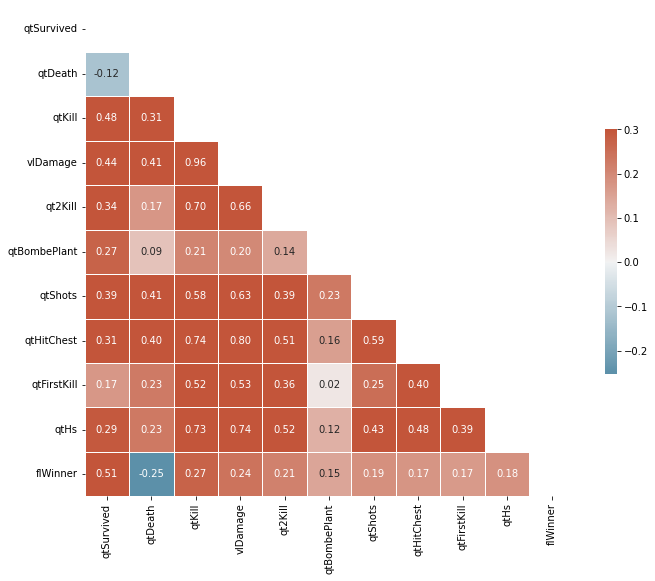

In [27]:
def correlationPlot(data):
    fig, ax = plt.subplots(figsize=(11, 9))
    corrMatrix = data.corr(method = 'pearson')
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                fmt = '.2f', annot = True)

    plt.show()

correlationPlot(kBestFeatures)

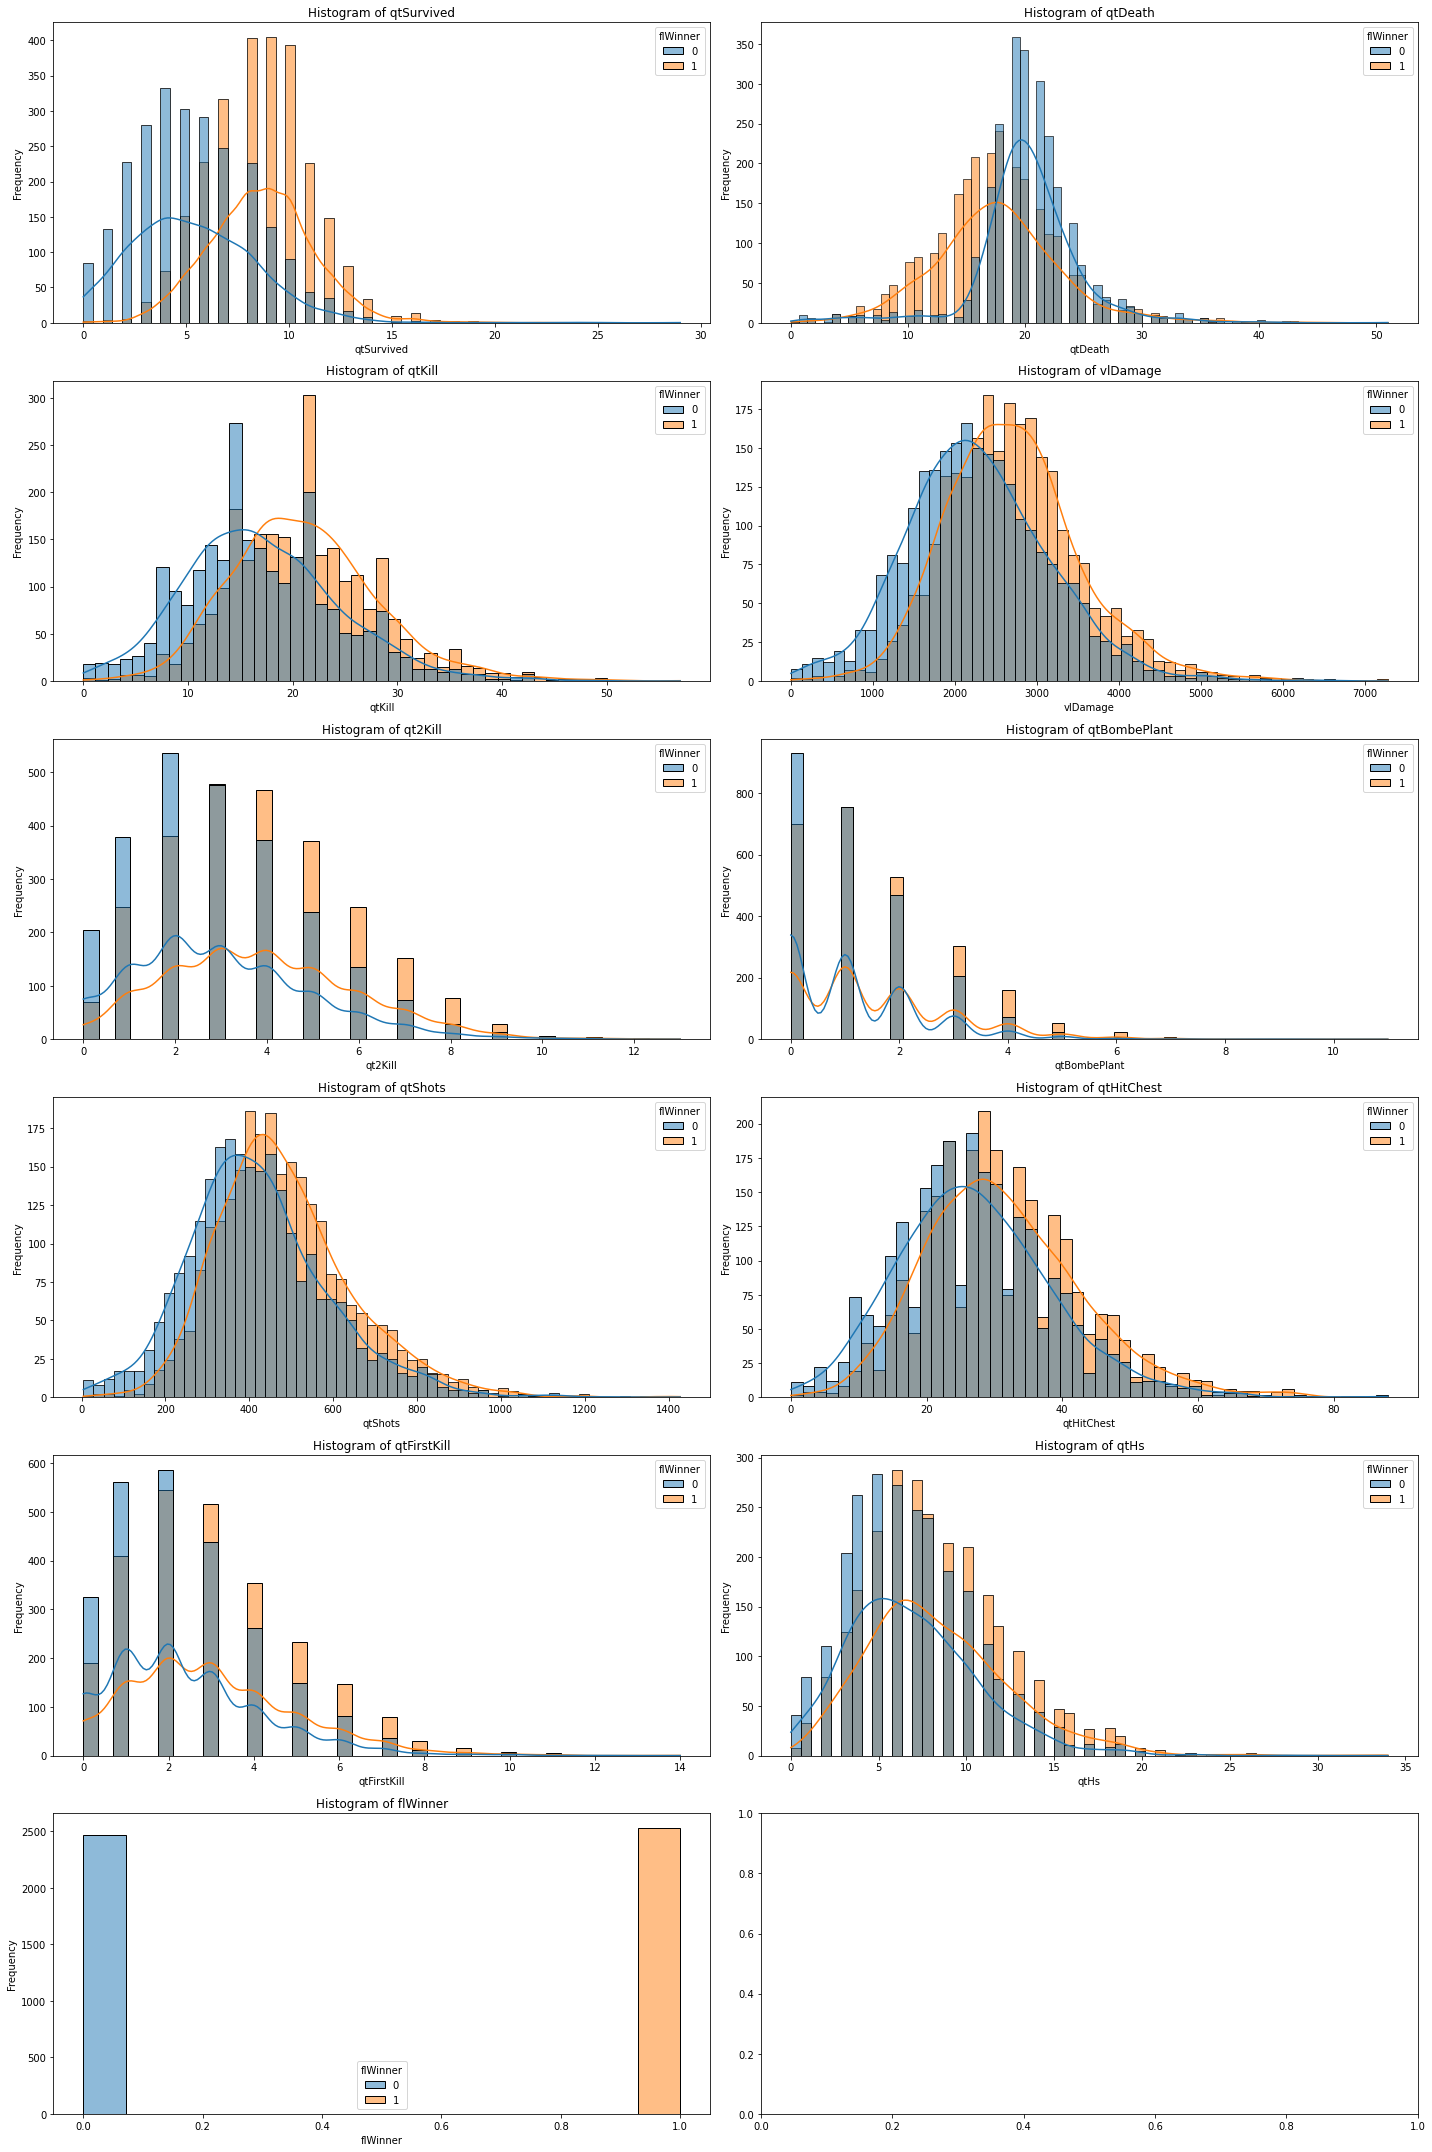

In [28]:
histPlot(kBestFeatures)

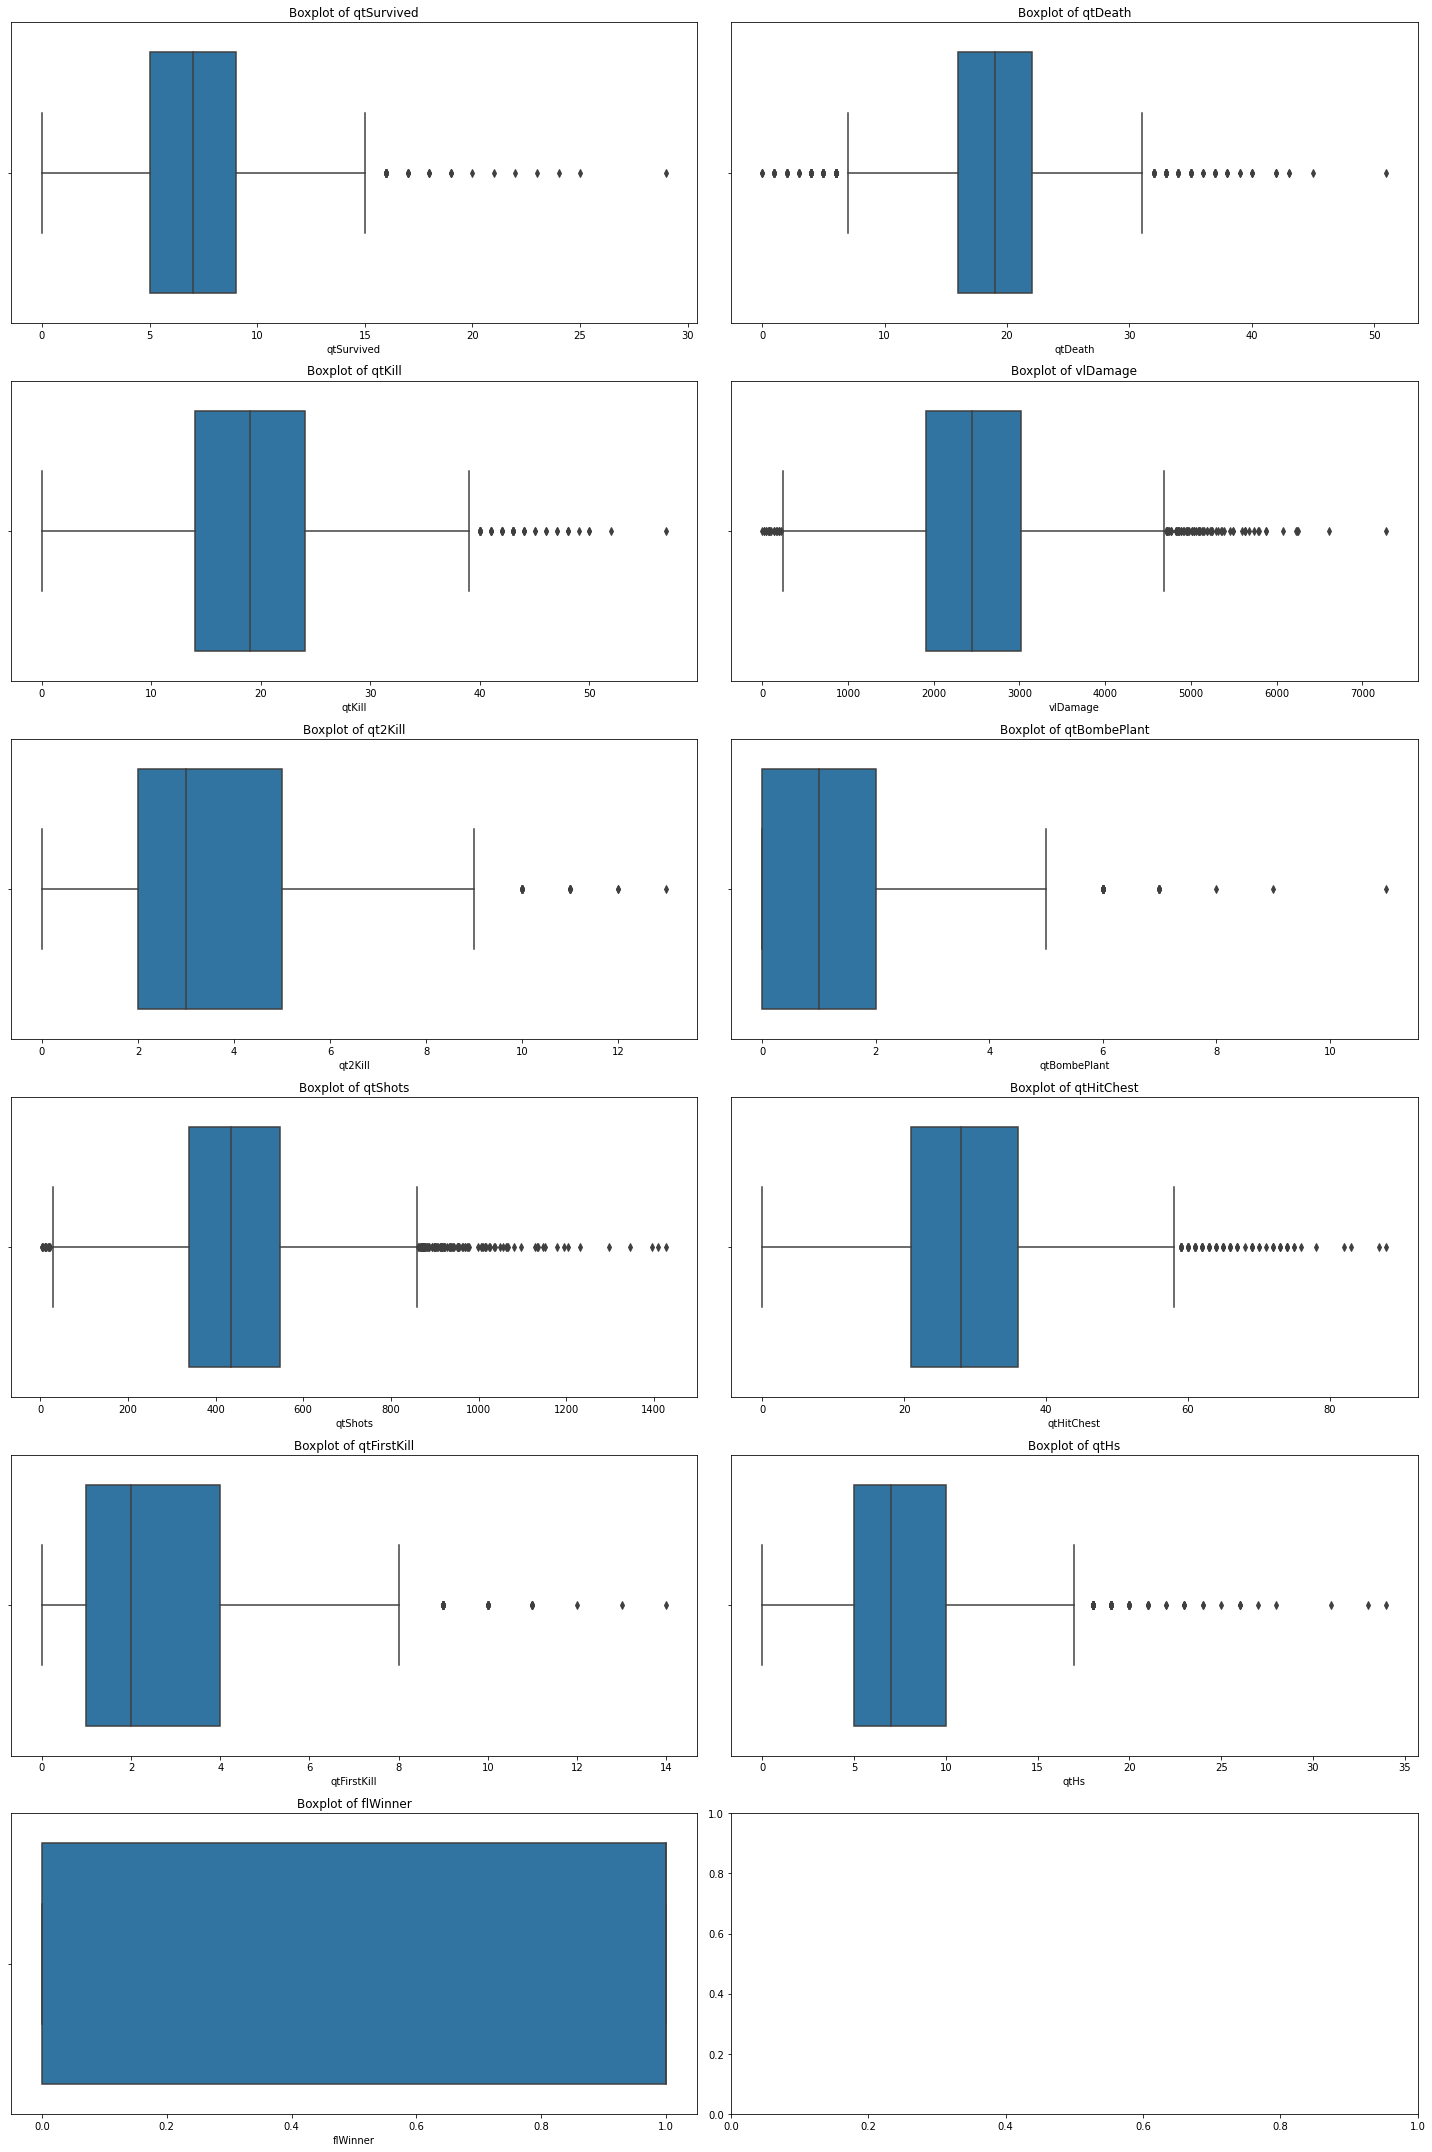

In [29]:
boxPlots(kBestFeatures)